# Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.
# Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11
# Task
You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset..3 to 29.8T
): 0 to 0.97



In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
df=pd.read_csv('temperature.csv')
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

# EDA

In [3]:
# shape of dataset
df.shape

(7752, 25)

Dataset contains 7752 rows and 25 columns. In these 25 columns Two column(NextTmax, NextTmin) are target variables rest are independent variable.

In [5]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [6]:
# datatypes in dataset
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Two types of data (float, object) present in dataset. 

In [8]:
# Changing datatype of date
df['Date']=pd.to_datetime(df['Date'])

In [11]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In [12]:
# Null values in dataset
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Apart from Lat, lon, dem, slope, and solar radiation null values are present in every column. Highest is 75. Also null values are present in target variables which we are going to drop. and also going to drop null values from date column.Cause it has least number of null values(2).

In [13]:
# Null value percentage in dataset
df.isnull().sum()/df.shape[0]*100

station             0.025800
Date                0.025800
Present_Tmax        0.902993
Present_Tmin        0.902993
LDAPS_RHmin         0.967492
LDAPS_RHmax         0.967492
LDAPS_Tmax_lapse    0.967492
LDAPS_Tmin_lapse    0.967492
LDAPS_WS            0.967492
LDAPS_LH            0.967492
LDAPS_CC1           0.967492
LDAPS_CC2           0.967492
LDAPS_CC3           0.967492
LDAPS_CC4           0.967492
LDAPS_PPT1          0.967492
LDAPS_PPT2          0.967492
LDAPS_PPT3          0.967492
LDAPS_PPT4          0.967492
lat                 0.000000
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000000
Next_Tmax           0.348297
Next_Tmin           0.348297
dtype: float64

In [14]:
# dropping null values in Target variables and date
df.dropna(subset=['Next_Tmax','Next_Tmin','Date'],axis=0,inplace=True)

In [15]:
df.isnull().sum()

station              0
Date                 0
Present_Tmax        60
Present_Tmin        60
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax            0
Next_Tmin            0
dtype: int64

In [16]:
# Value count and number of unique value in each column
for d in df.columns:
    print(d)
    print(df[d].value_counts())
    print('Number of unique values:-',df[d].nunique())
    print('\n')

station
station
1.0     310
10.0    310
23.0    310
21.0    310
18.0    310
17.0    310
14.0    310
2.0     310
13.0    310
9.0     310
4.0     310
3.0     310
25.0    310
12.0    309
16.0    309
19.0    309
20.0    309
24.0    309
11.0    308
15.0    308
22.0    308
8.0     307
7.0     306
6.0     306
5.0     305
Name: count, dtype: int64
Number of unique values:- 25


Date
Date
2013-06-30    25
2015-07-21    25
2016-07-18    25
2016-07-17    25
2016-07-16    25
              ..
2017-07-09    24
2013-08-11    24
2013-08-03    24
2015-07-31    24
2017-08-23    23
Name: count, Length: 310, dtype: int64
Number of unique values:- 310


Present_Tmax
Present_Tmax
31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: count, Length: 167, dtype: int64
Number of unique values:- 167


Present_Tmin
Present_Tmin
24.0    161
23.8    153
23.1    143
23.5    143
23.3    140
       ... 
29.7      1
29.6      1
14.3    

In LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3 and LDAPS_PPT3 more than 60% rows have 0 as value so going to drop these columns.

In [17]:
# Top 20 rows
df.head(20)

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0       1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1       2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2       3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3       4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4       5.0 2013-06-30          31.4          21.9    56.174095    90.155128   
5       6.0 2013-06-30          31.9          23.5    52.437126    85.307251   
6       7.0 2013-06-30          31.4          24.4    56.287189    81.019760   
7       8.0 2013-06-30          32.1          23.6    52.326218    78.004539   
8       9.0 2013-06-30          31.4          22.0    55.338791    80.784607   
9      10.0 2013-06-30          31.6          20.5    56.651203    86.849632   
10     11.0 2013-06-30          31.7          23.5    51.156395    85.385635   
11     12.0 2013-06-30          31.6          22.2    51.288349    80.338013   
12     13.0 2013-06-30          32.1          23.8    48.767929    84.008163   
13     14.0 2013-06-30          31.3          23.8    50.745735    74.498810   
14     15.0 2013-06-30          32.5          23.6    51.773392    72.999237   
15     16.0 2013-06-30          30.7          21.4    56.848339    84.408173   
16     17.0 2013-06-30          32.1          20.1    54.352501    93.218315   
17     18.0 2013-06-30          32.8          23.8    56.144707    88.364731   
18     19.0 2013-06-30          31.4          22.8    52.265926    75.483757   
19     20.0 2013-06-30          30.9          22.2    61.493835    95.245232   

    LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0          28.074101         23.006936  6.818887   69.451805  ...         0.0   
1          29.850689         24.035009  5.691890   51.937448  ...         0.0   
2          30.091292         24.565633  6.138224   20.573050  ...         0.0   
3          29.704629         23.326177  5.650050   65.727144  ...         0.0   
4          29.113934         23.486480  5.735004  107.965535  ...         0.0   
5          29.219342         23.822613  6.182295   50.231389  ...         0.0   
6          28.551859         24.238467  5.587135  125.110007  ...         0.0   
7          28.851982         23.819054  6.104417   42.011547  ...         0.0   
8          28.426975         23.332373  6.017135   85.110971  ...         0.0   
9          27.576705         22.527018  6.518841   63.006075  ...         0.0   
10         29.694724         24.432646  6.411812   55.690312  ...         0.0   
11         28.936314         24.365949  6.423993   28.719288  ...         0.0   
12         29.929272         24.281750  5.988361   32.039448  ...         0.0   
13         29.498526         24.459427  6.319478   16.835611  ...         0.0   
14         29.640103         25.152909  6.360547   32.275122  ...         0.0   
15         28.476517         23.695151  5.639549   83.417605  ...         0.0   
16         29.321525         23.036163  5.497787   97.971438  ...         0.0   
17         28.676175         23.448165  5.665435   81.938271  ...         0.0   
18         29.273668         24.970151  6.359286   36.339969  ...         0.0   
19         28.502989         23.031539  6.814792   70.166936  ...         0.0   

    LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0          0.0         0.0  37.6046  126.991  212.3350  2.7850   
1          0.0         0.0  37.6046  127.032   44.7624  0.5141   
2          0.0         0.0  37.5776  127.058   33.3068  0.2661   
3          0.0         0.0  37.6450  127.022   45.7160  2.5348   
4          0.0         0.0  37.5507  127.135   35.0380  0.5055   
5          0.0         0.0  37.5102  127.042   54.6384  0.1457   
6          0.0         0.0  37.5776  126.838   12.3700  0.0985   
7          0.0         0.0  37.4697  126.910   52.5180  1.5629   
8          0.0         0.0 

In [18]:
# Bottom 20 rows
df.tail(20)

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7730      6.0 2017-08-30          23.0          17.9    26.961586   
7731      7.0 2017-08-30          23.5          16.6    32.614983   
7732      8.0 2017-08-30          22.5          16.5    23.428869   
7733      9.0 2017-08-30          23.3          15.8    29.709179   
7734     10.0 2017-08-30          21.4          14.1    25.229910   
7735     11.0 2017-08-30          23.0          16.5    28.319260   
7736     12.0 2017-08-30          23.8          15.4    25.464573   
7737     13.0 2017-08-30          23.8          17.1    28.521656   
7738     14.0 2017-08-30          23.1          17.2    21.468115   
7739     15.0 2017-08-30          23.4          16.1    22.562298   
7740     16.0 2017-08-30          21.7          15.2    27.868839   
7741     17.0 2017-08-30          22.6          14.6    35.059216   
7742     18.0 2017-08-30          23.3          18.2    30.259682   
7743     19.0 2017-08-30          22.6          15.0    25.536045   
7744     20.0 2017-08-30          22.7          15.9    38.216373   
7745     21.0 2017-08-30          23.1          17.8    24.688997   
7746     22.0 2017-08-30          22.5          17.4    30.094858   
7747     23.0 2017-08-30          23.3          17.1    26.741310   
7748     24.0 2017-08-30          23.3          17.7    24.040634   
7749     25.0 2017-08-30          23.2          17.4    22.933014   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
7730    81.591942         27.191402         17.795103  6.467678   53.966684   
7731    91.536095         25.233300         18.248183  5.036397  118.892933   
7732    83.089272         26.804746         18.047354  6.742729   64.152702   
7733    90.403275         25.799004         17.383095  5.805489  108.981960   
7734    86.536469         25.878358         16.993471  6.542819   69.655613   
7735    82.678833         27.354836         17.934175  6.031364   44.483636   
7736    78.012566         26.860758         17.560685  7.411646   19.791088   
7737    81.337837         27.094065         17.444269  5.693622   48.882029   
7738    74.958038         27.659242         18.721456  6.990299   17.905112   
7739    75.351555         27.451492         18.612977  7.041802   20.186169   
7740    85.979271         26.400334         17.217080  6.395609   82.487679   
7741    89.616730         26.112684         16.446214  5.147585  118.735384   
7742    86.565193         26.474403         17.289157  6.522731   94.203783   
7743    78.779045         26.596280         17.856040  6.905963   54.030075   
7744    94.428116         24.037222         15.772677  6.478060  112.580310   
7745    78.261383         27.812697         18.303014  6.603253    9.614074   
7746    83.690018         26.704905         17.814038  5.768083   82.146707   
7747    78.869858         26.352081         18.775678  6.148918   72.058294   
7748    77.294975         27.010193         18.733519  6.542819   47.241457   
7749    77.243744         27.939516         18.522965  7.289264    9.090034   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7730  ...         0.0         0.0         0.0  37.5102  127.042   54.6384   
7731  ...         0.0         0.0         0.0  37.5776  126.838   12.3700   
7732  ...         0.0         0.0         0.0  37.4697  126.910   52.5180   
7733  ...         0.0         0.0         0.0  37.4967  126.826   50.9312   
7734  ...         0.0         0.0         0.0  37.4562  126.955  208.5070   
7735  ...         0.0         0.0         0.0  37.5372  127.085   28.7000   
7736  ...         0.0         0.0         0.0  37.5507  126.988  132.1180   
7737  ...         0.0         0.0         0.0  37.5776  127.083   59.8324   
7738  ...         0.0         0.0         0.0  37.4967  126.927   30.9680   
7739  ...         0.0         0.0         0.0  37.5507  126.937   30.0464   
7740  ...         0.0         0.0         0.0  37

In [19]:
# Dropping columns with most 0 values
df.drop(columns={'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4'},inplace=True)

In [20]:
# Filling null values
for d in df.columns:
    df[d].fillna(df[d].median(),inplace=True)

In [21]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [22]:
# Extracting day and month from date column
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month

In [23]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'lat',
       'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin',
       'Day', 'Month'],
      dtype='object')

In [24]:
# Dropping date column
df.drop(columns={'Date'},inplace=True)

In [25]:
df.shape

(7723, 22)

# Graphical Analysis

Univariate Analysis

Data Distribution

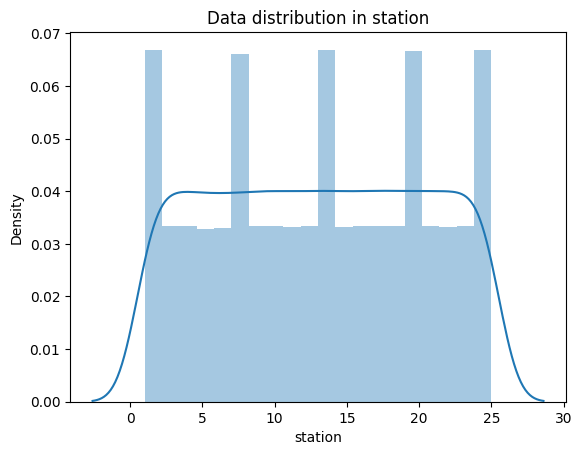

In [26]:
sns.distplot(df['station'])
plt.title('Data distribution in station')
plt.show()

Graph is normally distributed data in Station column.

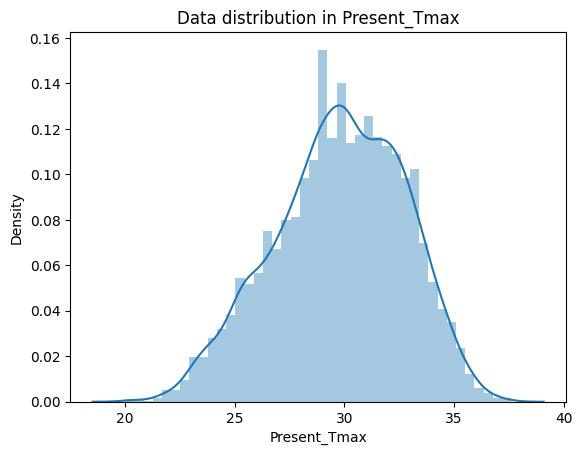

In [27]:
sns.distplot(df['Present_Tmax'])
plt.title('Data distribution in Present_Tmax')
plt.show()

Graph is showing normally distributed data in Present_Tmax Column.

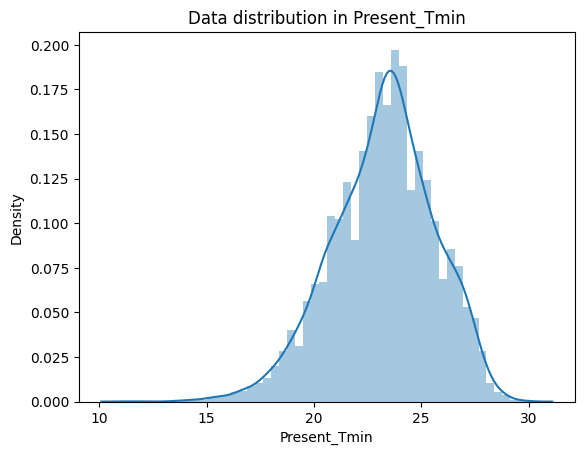

In [28]:
sns.distplot(df['Present_Tmin'])
plt.title('Data distribution in Present_Tmin')
plt.show()

Graph is showing left skewed data in Present_Tmin column. which means Median is greater than Mean.

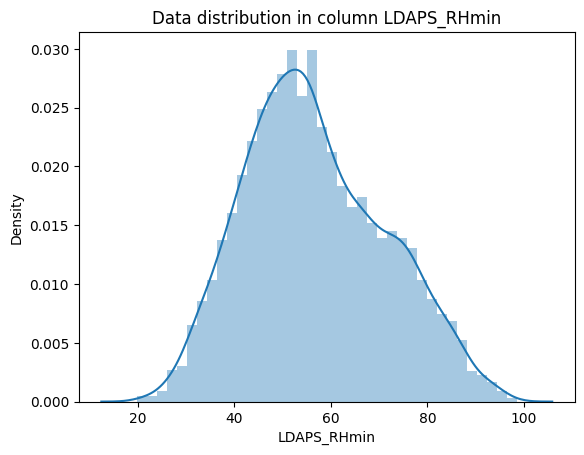

In [29]:
sns.distplot(df['LDAPS_RHmin'])
plt.title('Data distribution in column LDAPS_RHmin')
plt.show()

Graph is showing Normally distributed data in LDAPS_RHmin Column.

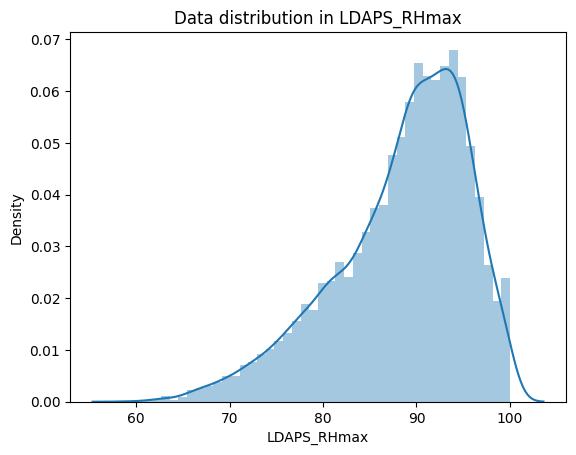

In [31]:
sns.distplot(df['LDAPS_RHmax'])
plt.title('Data distribution in LDAPS_RHmax')
plt.show()

Graph is showing left skewed distribution in LDAPS_RHmax Column.

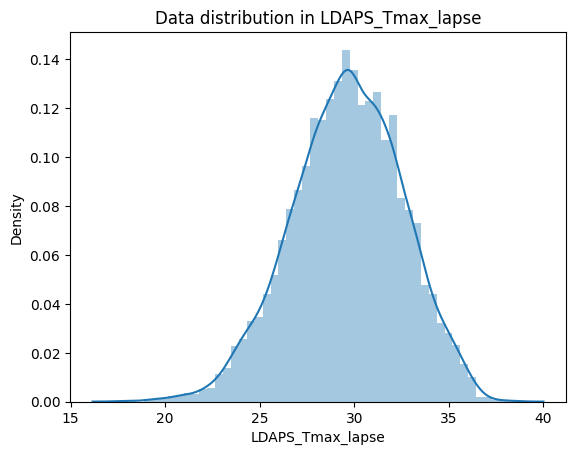

In [32]:
sns.distplot(df['LDAPS_Tmax_lapse'])
plt.title('Data distribution in LDAPS_Tmax_lapse')
plt.show()

Normally distributed data in LDAPS_Tmax_lapse Column.

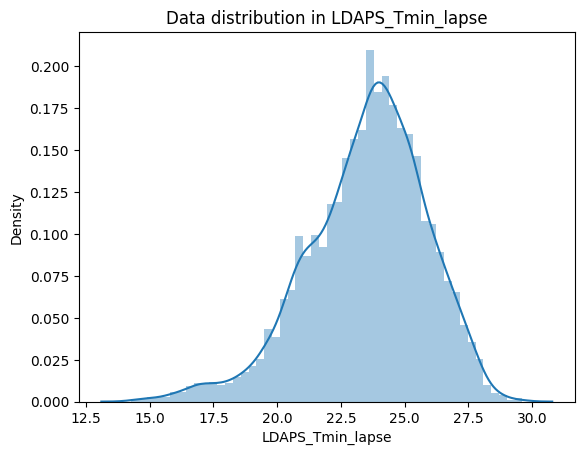

In [33]:
sns.distplot(df['LDAPS_Tmin_lapse'])
plt.title('Data distribution in LDAPS_Tmin_lapse')
plt.show()

Distribution is Left skewed in LDAPS_Tmin_lapse.

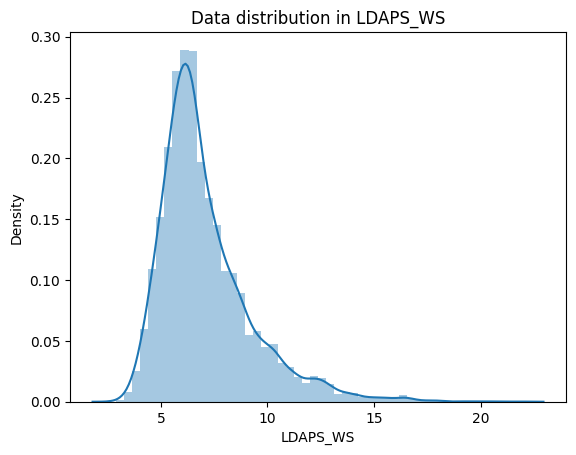

In [34]:
sns.distplot(df['LDAPS_WS'])
plt.title('Data distribution in LDAPS_WS')
plt.show()

Distribution is Right skewed in LDAPS_WS. Which means MEAN is Greater than MEDIAN.

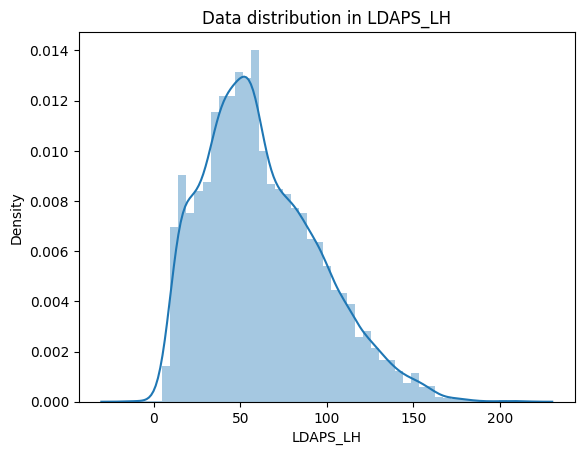

In [35]:
sns.distplot(df['LDAPS_LH'])
plt.title('Data distribution in LDAPS_LH')
plt.show()

Data distribution is Right skewed in LDAPS_LH column.

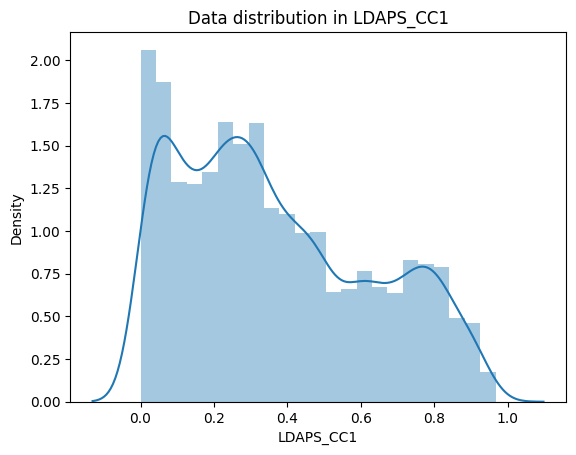

In [36]:
sns.distplot(df['LDAPS_CC1'])
plt.title('Data distribution in LDAPS_CC1')
plt.show()

 Graph is showing distribution is Right Skewed in LDAPS_CC1 Column.

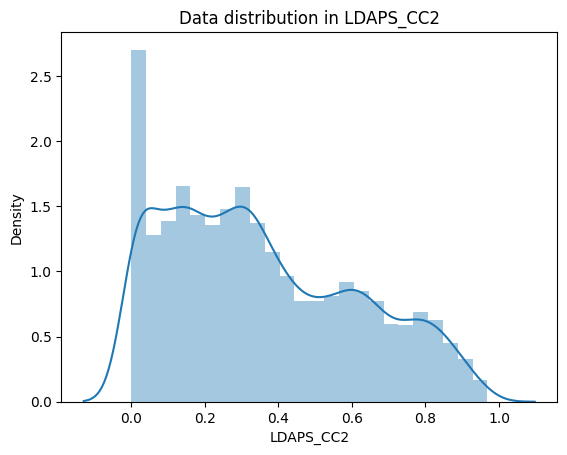

In [37]:
sns.distplot(df['LDAPS_CC2'])
plt.title('Data distribution in LDAPS_CC2')
plt.show()

 Graph is showing Right skewed distribution in LDAPS_CC2 Column.

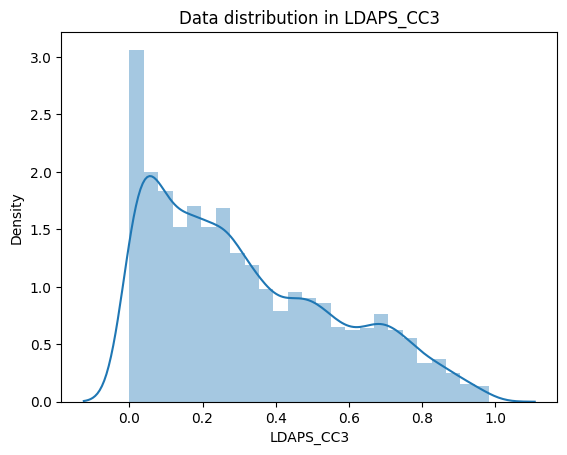

In [38]:
sns.distplot(df['LDAPS_CC3'])
plt.title('Data distribution in LDAPS_CC3')
plt.show()

Data distribution is Right skewed in LDAPS_CC3 Column.

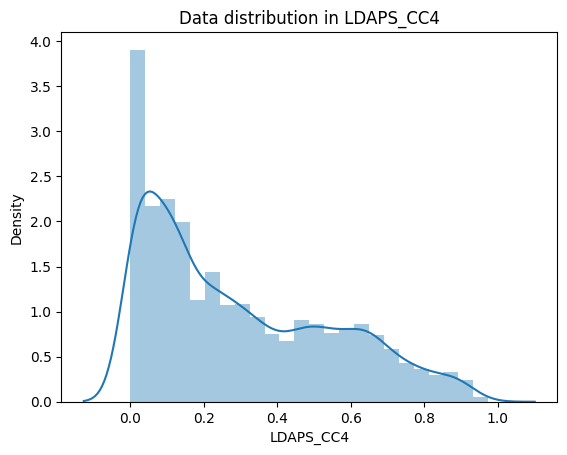

In [39]:
sns.distplot(df['LDAPS_CC4'])
plt.title('Data distribution in LDAPS_CC4')
plt.show()

Graph is showing that the peak of the distribution is on lower side. which means distribution is Right Skewed.

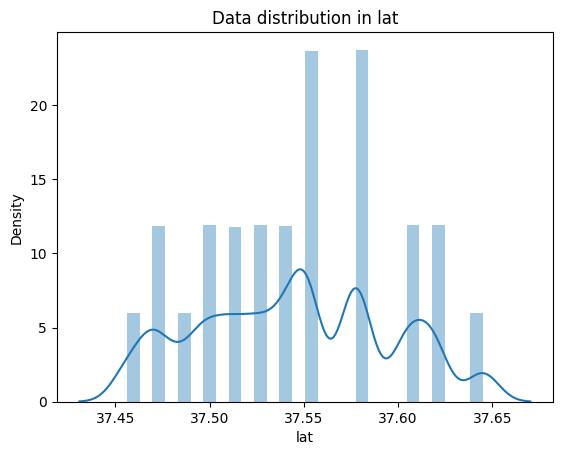

In [40]:
sns.distplot(df['lat'])
plt.title('Data distribution in lat')
plt.show()

Graph is looking Normally distributed in lat column.

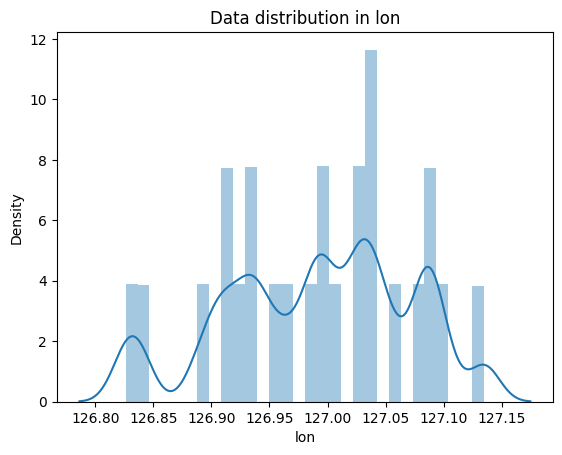

In [41]:
sns.distplot(df['lon'])
plt.title('Data distribution in lon')
plt.show()

Normally distributed data in lon Column.

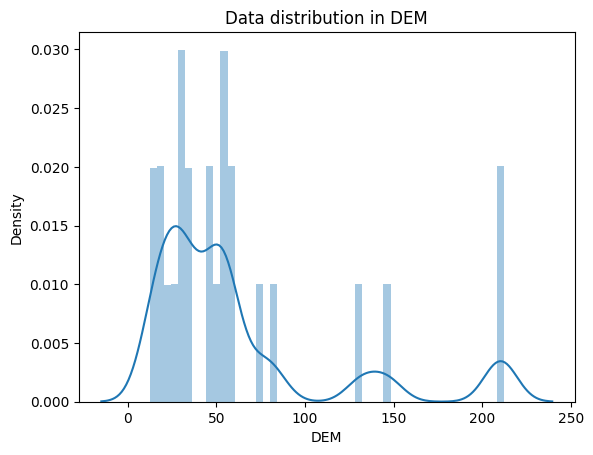

In [42]:
sns.distplot(df['DEM'])
plt.title('Data distribution in DEM')
plt.show()

Graph is showing right skewed data in DEM column.

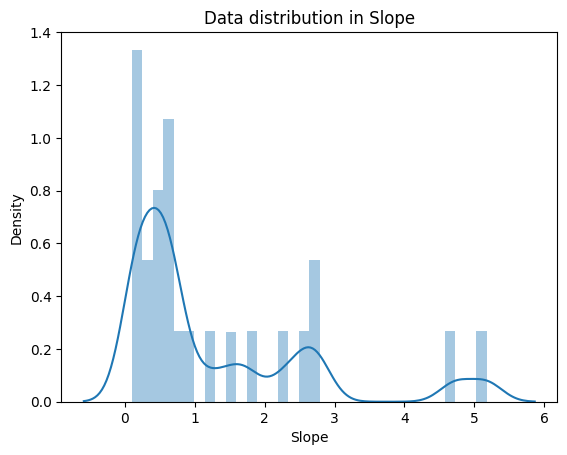

In [43]:
sns.distplot(df['Slope'])
plt.title('Data distribution in Slope')
plt.show()

Right Skewed Distribution in Slope Column.

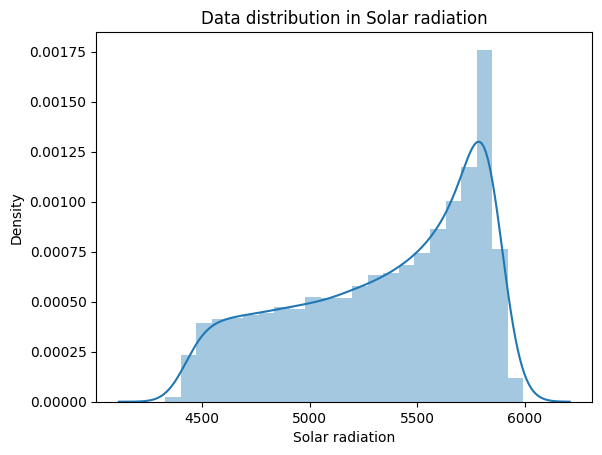

In [44]:
sns.distplot(df['Solar radiation'])
plt.title('Data distribution in Solar radiation')
plt.show()

Data distribution is Left skewed in Solar radiation.

Bivariate Analysis

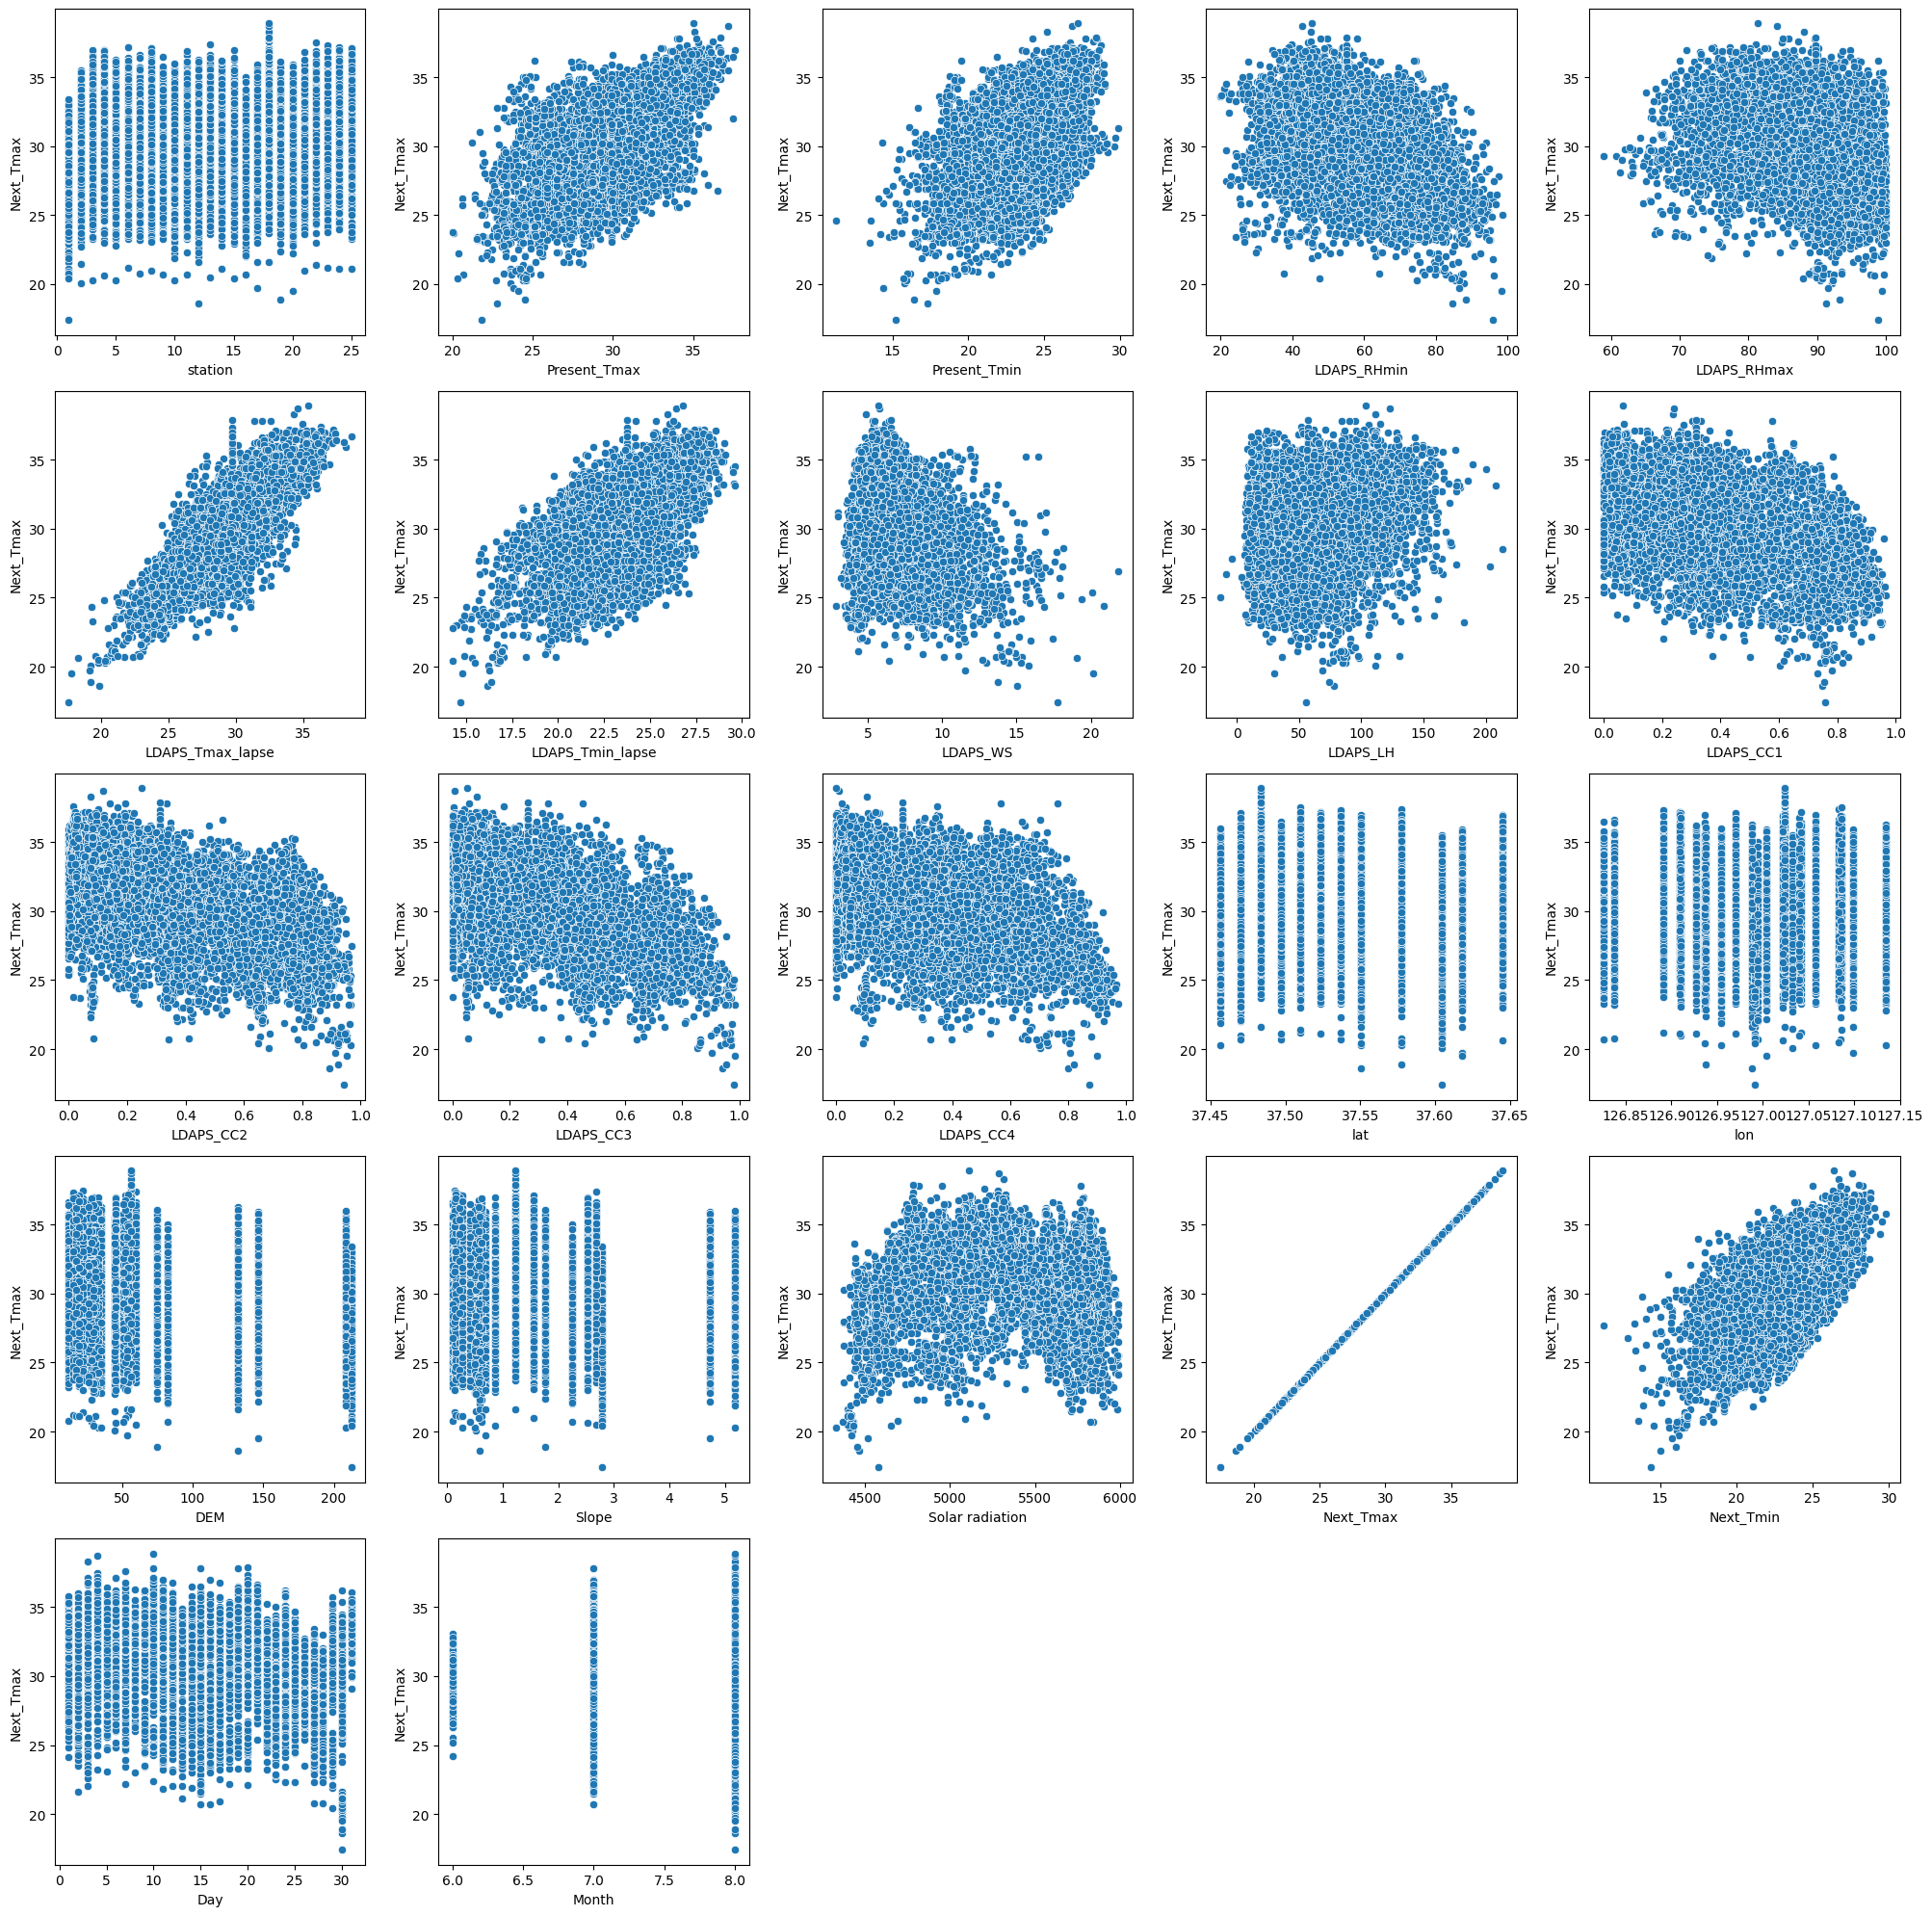

In [47]:
#Checking Relation of columns with Next_Tmax
plt.figure(figsize=(20,20))
plot=1
for column in df.columns:
    if plot<=22:
        subplot=plt.subplot(5,5,plot)
        sns.scatterplot(x=column,y='Next_Tmax',data=df)
        plt.xlabel(column)
        plt.ylabel('Next_Tmax')
    plot+=1
plt.tight_layout()

1) Present_Tmax, Present_Tmin, LDAPS_Tmax_lapse, LDAPS_TMin_lapse, LDAPS_LH and Next_Tmin have Positive relation with Next_Tmax. which means if values of these columns is increasing Next day maximum temperature is also increasing.
2) LDAPS_RH_min, LDAPS_RH_max, LDAPS_WS, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, and LDAPS_CC4 have negative relation with Next_Tmax. which means if these columns are increasing Next day Maximum temperature is decreasing.

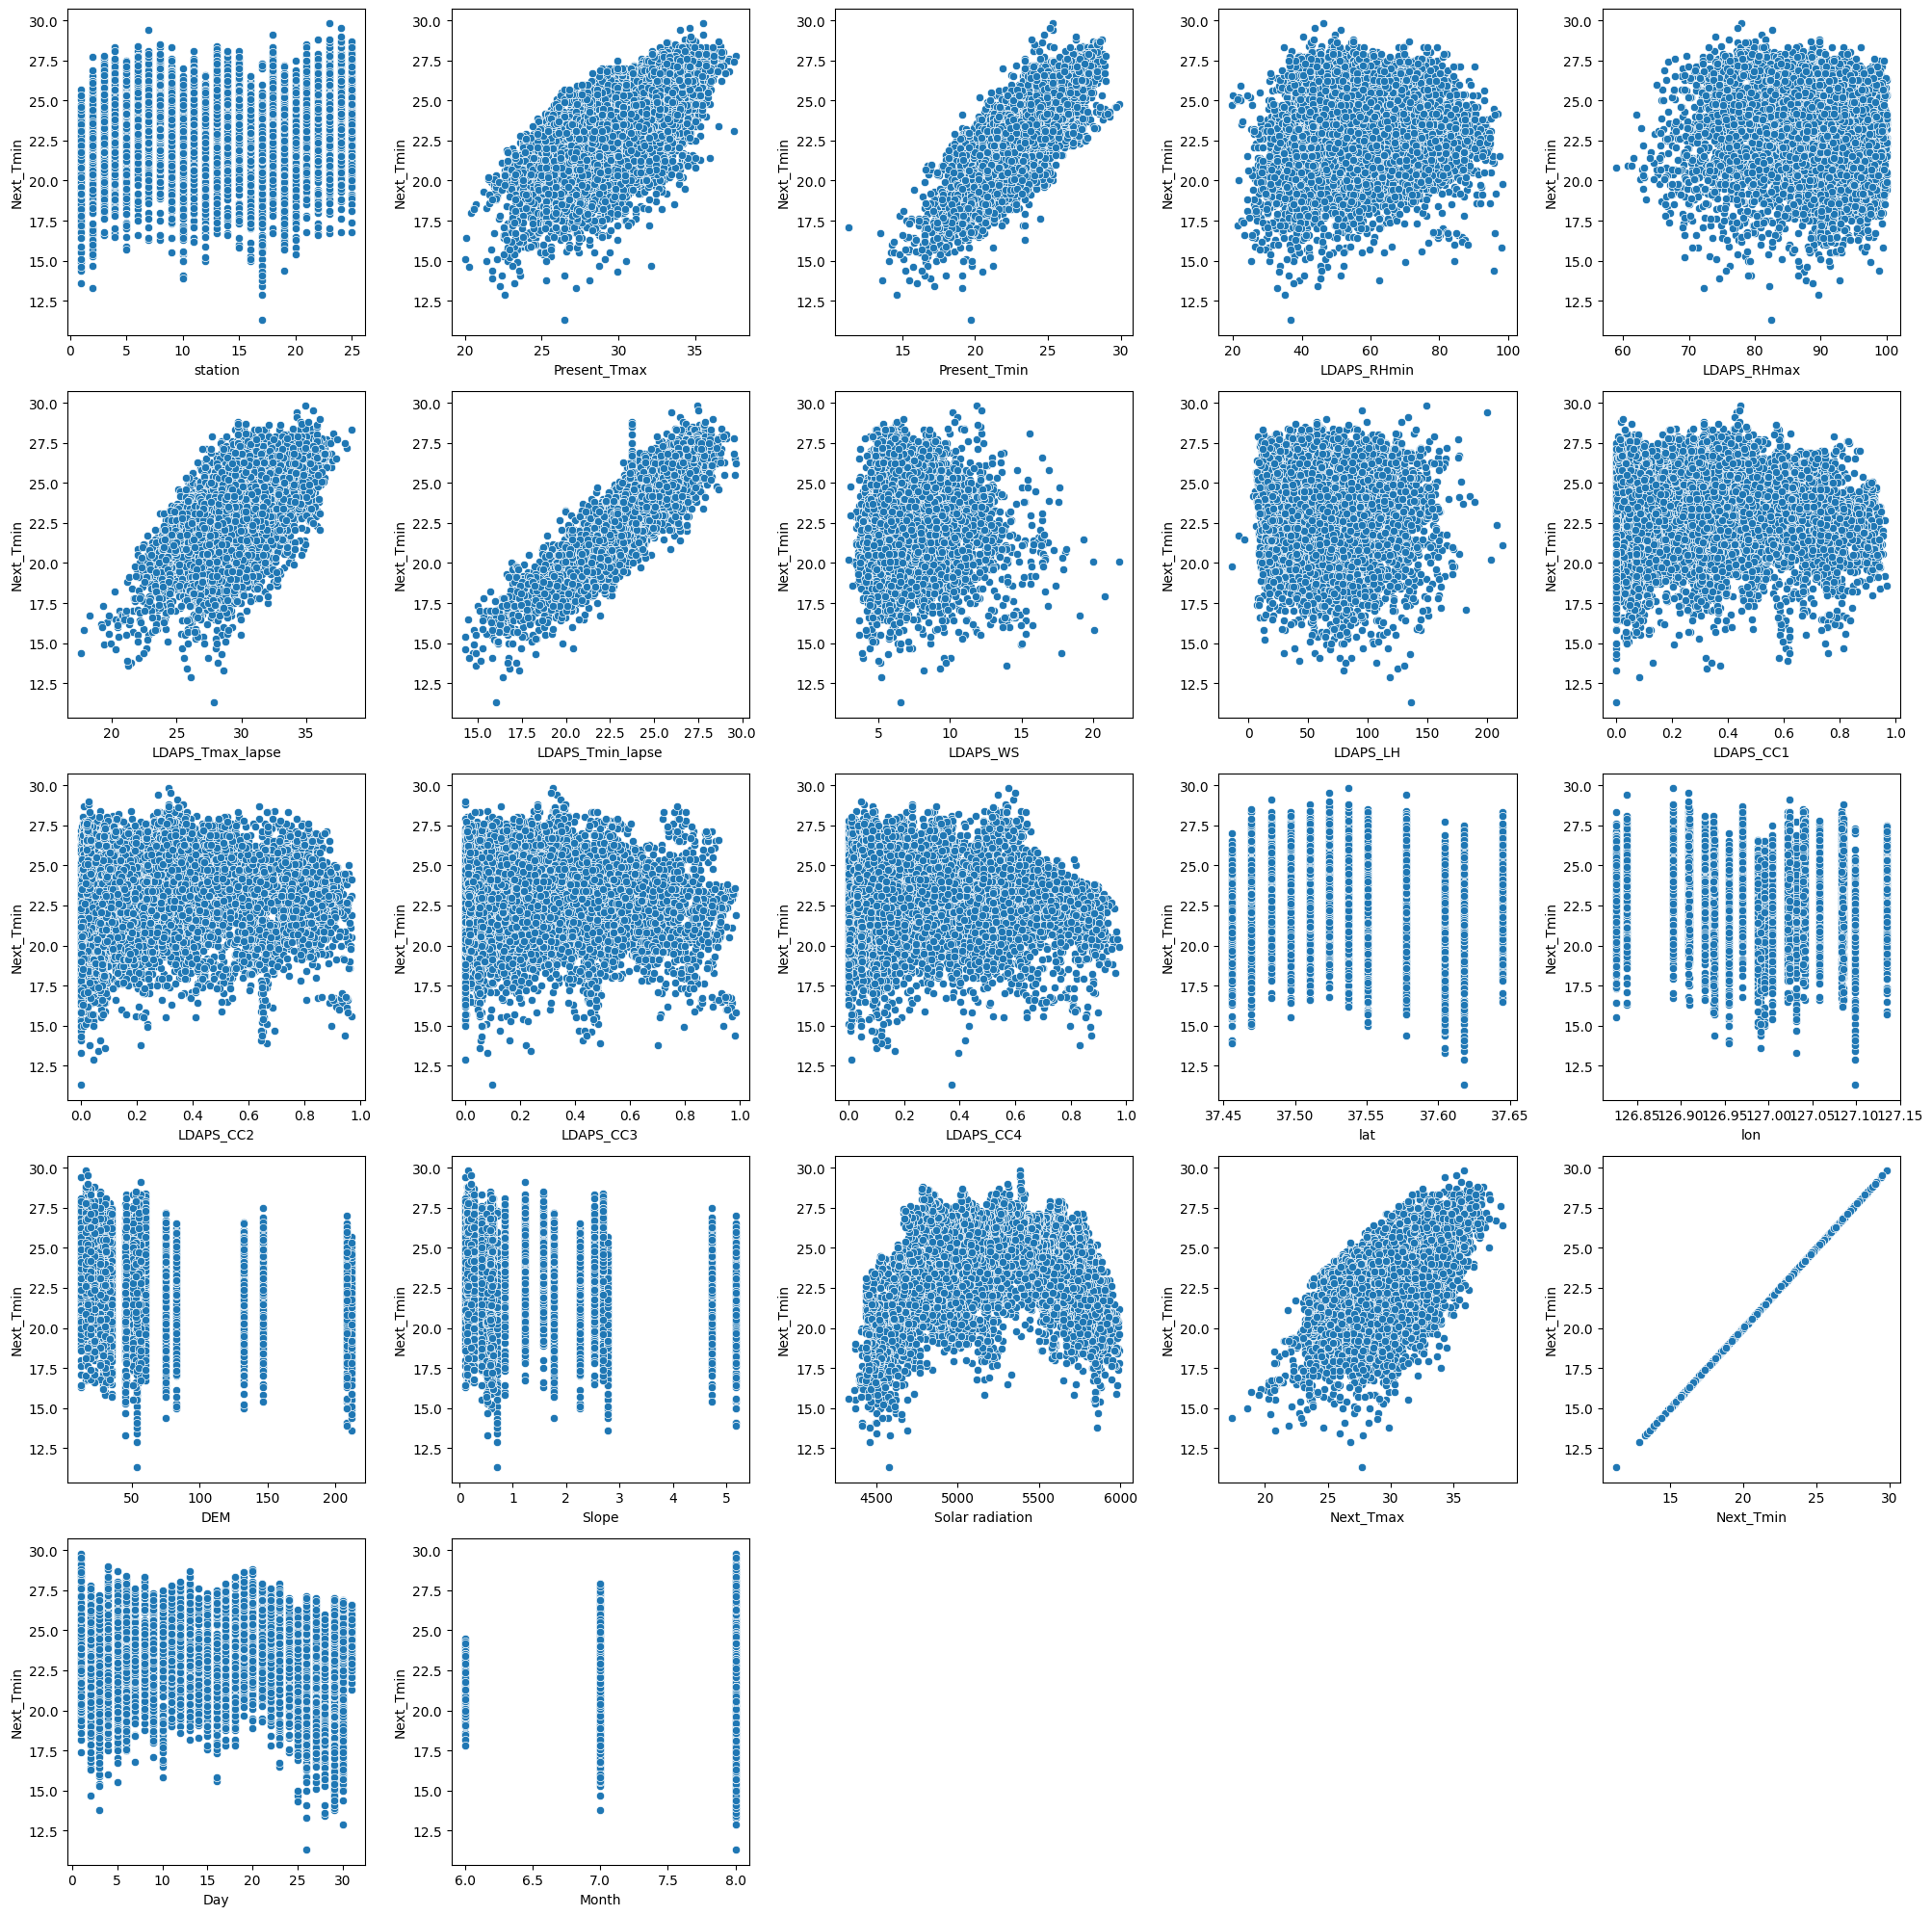

In [49]:
# Checking relation of columns with next tmin
plt.figure(figsize=(20,20))
plot=1
for column in df.columns:
    if plot <=22:
        subplot=plt.subplot(5,5,plot)
        sns.scatterplot(x=column,y='Next_Tmin',data=df)
        plt.xlabel(column)
        plt.ylabel('Next_Tmin')
    plot+=1
plt.tight_layout()

1) Present_Tmax, Present_Tmin, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDASPS_WS and Next_Tmax have positive relation with Next day minimum temperature.
2) LDAPS_LH and LDAPS_RHmax have negative relation with next day minimum temperature.

# Correlation

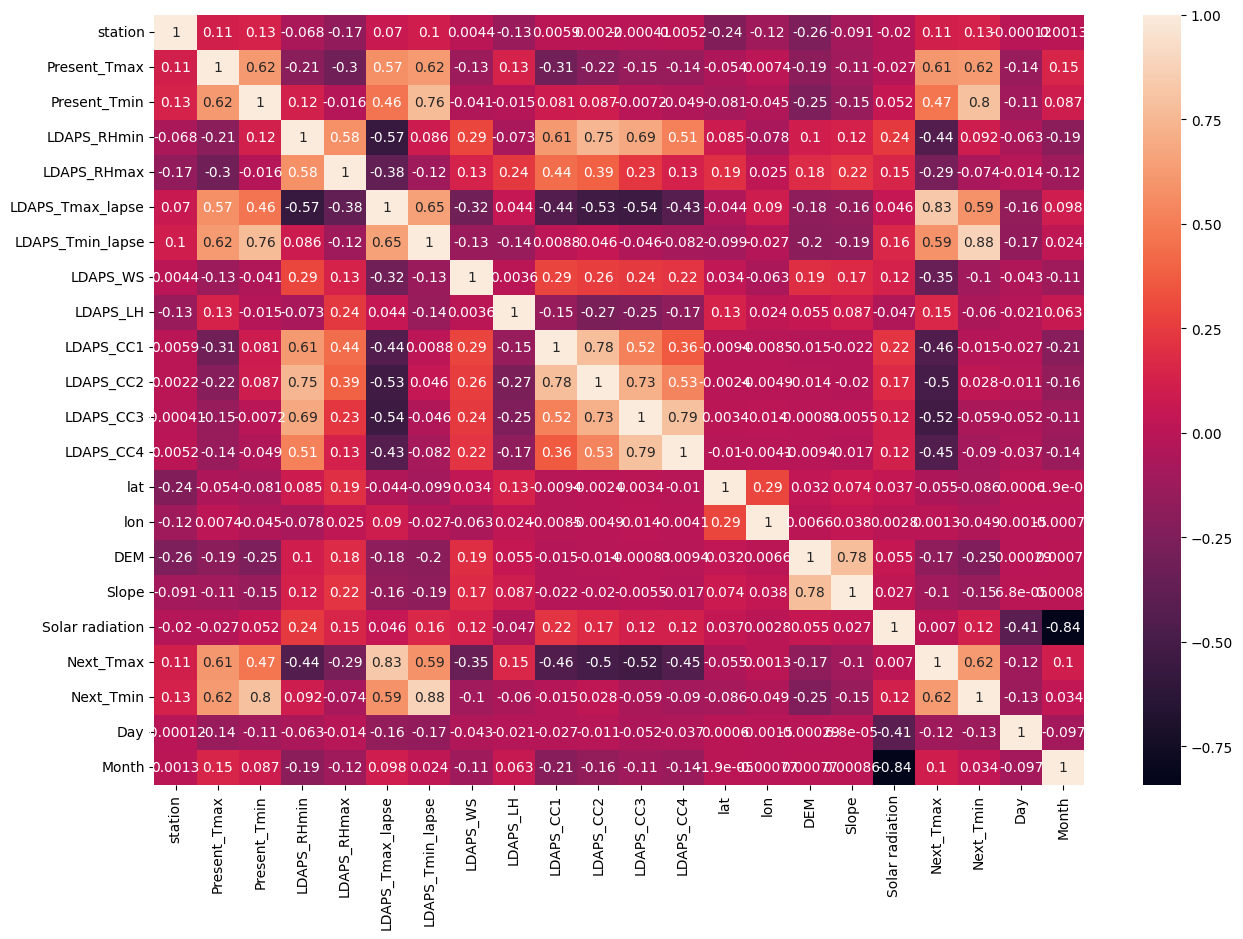

In [50]:
# Checking correlation using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

1) LDAPS_Tmax_lapse has highest positive correlation with NextTmax and LDAPS_Tmin_lapse has highest negative correlation with NextTmin.
2) LDAPS_CC3 has highest negative correlation with NextTmax.
3) Day, Month, Solar radiation, lon and Lat columns none of them have very strong correlation with either of target( Next_Tmax and Next_Tmin) variables. Hence we are going to drop these columns.

In [51]:
# dropping columns with least correlation
df.drop(columns={'Day','Month','Solar radiation','lon','lat'},inplace=True)

In [52]:
df.shape

(7723, 17)

# Outliers

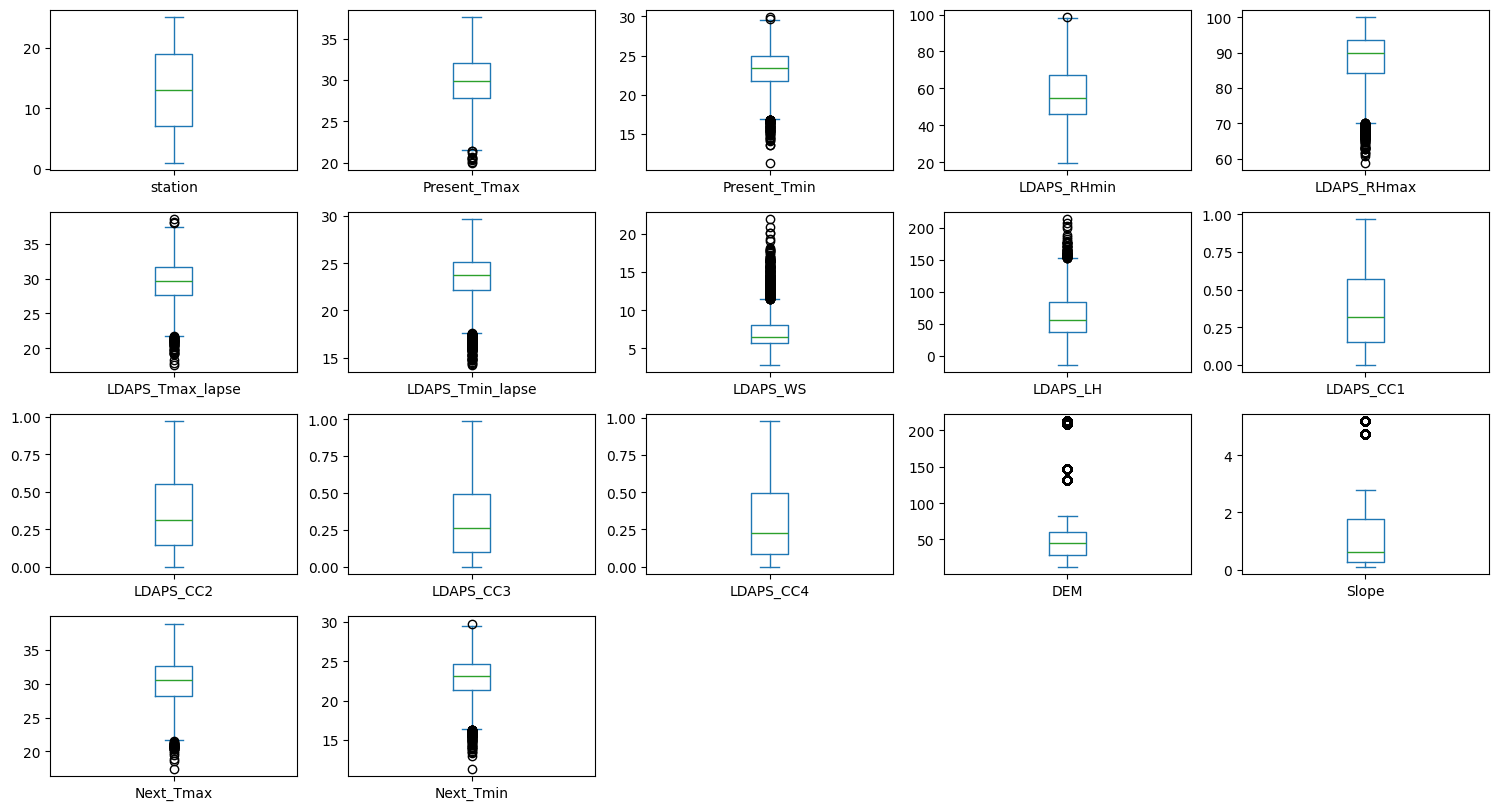

In [53]:
# Plotting boxplot to check outliers
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,10))
plt.tight_layout()

Apart from station, LDAPS_RHmin, LDAPS_CC1, CC2, CC3 and CC4 Outliers are present in rest of the columns. Because here Next_Tmin is our target variable so we are not going to remove outliers from it.

In [54]:
# Importing Zscore
from scipy.stats import zscore

In [55]:
# Checking zscore
z1=np.abs(zscore(df.iloc[:,:-1]))

In [57]:
z1.T

0         1         2         3         4         5     \
station           1.664663  1.526035  1.387408  1.248780  1.110152  0.971525   
Present_Tmax      0.362257  0.720291  0.618803  0.754121  0.551143  0.720291   
Present_Tmin      0.760881  0.677573  0.030543  0.072197  0.552611  0.113851   
LDAPS_RHmin       0.105111  0.306116  0.551311  0.104020  0.037740  0.294193   
LDAPS_RHmax       0.381609  0.310119  0.616433  1.131571  0.247298  0.430083   
LDAPS_Tmax_lapse  0.527206  0.079648  0.161834  0.029756  0.172016  0.136010   
LDAPS_Tmin_lapse  0.217804  0.223267  0.450918  0.080841  0.012067  0.132143   
LDAPS_WS          0.125210  0.645617  0.439516  0.664938  0.625709  0.419166   
LDAPS_LH          0.210322  0.312373  1.248404  0.099164  1.359716  0.363288   
LDAPS_CC1         0.513364  0.545699  0.607632  0.580703  0.829614  0.699835   
LDAPS_CC2         0.590207  0.403623  0.381416  0.504052  0.410545  0.290421   
LDAPS_CC3         0.626371  0.635425  0.455985  0.628539  0.557261  0.340439   
LDAPS_CC4         0.661918  0.674574  0.617650  0.648791  0.507362  0.600896   
DEM               2.769916  0.315833  0.526781  0.298273  0.494902  0.133972   
Slope             1.113817  0.543011  0.723950  0.931274  0.549286  0.811793   
Next_Tmax         0.376352  0.071901  0.264009  0.456117  0.296027  0.392081   

                      6         7         8         9     ...      7740  \
station           0.832897  0.694269  0.555642  0.417014  ...  0.414752   
Present_Tmax      0.551143  0.787951  0.551143  0.618803  ...  2.730332   
Present_Tmin      0.488736  0.155505  0.510958  1.135766  ...  3.343424   
LDAPS_RHmin       0.029979  0.301805  0.095064  0.004998  ...  1.980217   
LDAPS_RHmax       1.029163  1.450472  1.062021  0.214570  ...  0.336184   
LDAPS_Tmax_lapse  0.364012  0.261495  0.406670  0.697109  ...  1.098939   
LDAPS_Tmin_lapse  0.310555  0.130616  0.078183  0.423701  ...  2.701805   
LDAPS_WS          0.693990  0.455127  0.495431  0.263761  ...  0.320665   
LDAPS_LH          1.871371  0.608599  0.677650  0.017957  ...  0.599361   
LDAPS_CC1         0.083011  0.038614  0.156443  0.075257  ...  1.270178   
LDAPS_CC2         0.084833  0.040567  0.041065  0.191287  ...  1.225783   
LDAPS_CC3         0.189411  0.181500  0.211272  0.290550  ...  1.276239   
LDAPS_CC4         0.603496  0.610868  0.590822  0.644067  ...  1.135361   
DEM               0.912319  0.173018  0.202238  2.699426  ...  0.375238   
Slope             0.846230  0.222184  0.617138  2.859875  ...  0.729250   
Next_Tmax         0.199973  0.264009  0.328045  0.071901  ...  1.400930   

                      7741      7742      7743      7744      7745      7746  \
station           0.553380  0.692008  0.830635  0.969263  1.107891  1.246518   
Present_Tmax      2.425865  2.189058  2.425865  2.392035  2.256717  2.459695   
Present_Tmin      3.593347  2.093806  3.426731  3.051846  2.260422  2.427038   
LDAPS_RHmin       1.486770  1.816143  2.140307  1.270107  2.198436  1.827454   
LDAPS_RHmax       0.172069  0.254314  1.342253  0.844352  1.414584  0.656055   
LDAPS_Tmax_lapse  1.197195  1.073638  1.032006  1.906140  0.616498  0.994902   
LDAPS_Tmin_lapse  3.032527  2.670882  2.427674  3.321493  2.235911  2.445695   
LDAPS_WS          0.896958  0.261964  0.085001  0.282592  0.224782  0.610434   
LDAPS_LH          1.681128  0.949013  0.249921  1.497438  1.575461  0.589185   
LDAPS_CC1         1.096518  1.235576  1.192731  1.264054  1.207029  1.155079   
LDAPS_CC2         1.209992  1.251013  1.087523  1.363874  1.267267  1.289288   
LDAPS_CC3         1.275923  1.276239  1.276239  1.276239  1.276239  1.276237   
LDAPS_CC4         1.139680  1.123928  1.179554  1.175844  1.162237  1.109663   
DEM               0.155465  0.100708  0.242676  1.558599  0.655844  0.735600   
Slope             0.409569  0.019749  0.371677  2.532581  0.500695  0.820913   
Next_Tmax         1.112767  0.792587  1.016713  1.144785  0.856623  0.728551   

                      77

In [59]:
# Threshold = 3
print(np.where(z1>3))

(array([  25,   33,   44,  175,  194,  269,  294,  344,  375,  394,  419,
        494,  519,  544,  569,  575,  584,  594,  967, 1321, 1421, 1491,
       1649, 1658, 1660, 1661, 1667, 1671, 1775, 1776, 1778, 1788, 1791,
       2172, 2173, 2174, 2175, 2176, 2176, 2177, 2178, 2178, 2179, 2180,
       2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191,
       2192, 2193, 2194, 2195, 2196, 2347, 2350, 2351, 2353, 2366, 2372,
       2375, 2391, 2438, 2524, 2540, 2565, 2671, 2746, 2771, 3100, 3112,
       3187, 3198, 3205, 3207, 3211, 3212, 3216, 3220, 3257, 3259, 3260,
       3262, 3264, 3268, 3269, 3282, 3284, 3285, 3294, 3371, 3374, 3390,
       3396, 3400, 3402, 3403, 3404, 3405, 3407, 3409, 3415, 3437, 3450,
       3462, 3471, 3473, 3474, 3475, 3476, 3477, 3478, 3478, 3479, 3480,
       3481, 3482, 3482, 3483, 3484, 3484, 3485, 3487, 3489, 3490, 3491,
       3491, 3493, 3494, 3495, 3521, 3713, 3936, 3942, 3961, 4463, 4464,
       4466, 4472, 4482, 4540, 4552, 4579, 4732, 4

In [60]:
# Removing outliers
dfn1=df[np.abs(z1<3).all(axis=1)]

In [61]:
# Data loss percentage due to ouliers
(df.shape[0]-dfn1.shape[0])/df.shape[0]*100

3.4960507574776636

3.50 % of data got removed due to presence of outliers.

# Skewness

In [62]:
# Checking skewness
dfn1.skew()

station             0.001263
Present_Tmax       -0.227394
Present_Tmin       -0.214274
LDAPS_RHmin         0.287668
LDAPS_RHmax        -0.754234
LDAPS_Tmax_lapse   -0.091903
LDAPS_Tmin_lapse   -0.375396
LDAPS_WS            1.025734
LDAPS_LH            0.598871
LDAPS_CC1           0.489372
LDAPS_CC2           0.476761
LDAPS_CC3           0.646633
LDAPS_CC4           0.681655
DEM                 1.774400
Slope               1.599148
Next_Tmax          -0.259748
Next_Tmin          -0.265567
dtype: float64

Skewness is present in LDAPS_RHmax, LDAPS_WS, LDAPS_LH, LDAPS_CC3, LDAPS_CC4, DEM and Slope. 

In [63]:
# Importing POWER TRANSFORMER
from sklearn.preprocessing import PowerTransformer

In [64]:
# Removing skewness
for d in dfn1.columns[0:-1]:
    if dfn1[d].skew()>0.5 or dfn1[d].skew()<-0.5:
        dfn1[[d]]=PowerTransformer().fit_transform(dfn1[[d]])

In [65]:
dfn1.skew()

station             0.001263
Present_Tmax       -0.227394
Present_Tmin       -0.214274
LDAPS_RHmin         0.287668
LDAPS_RHmax        -0.111831
LDAPS_Tmax_lapse   -0.091903
LDAPS_Tmin_lapse   -0.375396
LDAPS_WS            0.009669
LDAPS_LH           -0.013154
LDAPS_CC1           0.489372
LDAPS_CC2           0.476761
LDAPS_CC3           0.087762
LDAPS_CC4           0.128490
DEM                 0.038170
Slope               0.234911
Next_Tmax          -0.259748
Next_Tmin          -0.265567
dtype: float64

Splitting X and Y data

In [66]:
# Splitting X and Y variable
x1=dfn1.drop(columns={'Next_Tmin'})
y1=dfn1['Next_Tmin']

# Scaling

In [67]:
# Creating Scaling function
def scaling(data):
    from sklearn.preprocessing import StandardScaler
    data=pd.DataFrame(StandardScaler().fit_transform(data),columns=data.columns)
    return data

In [68]:
# Scaling X
x1=scaling(x1)

In [69]:
x1

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.670578     -0.387591     -0.831346     0.108178     0.270515   
1    -1.531701      0.720151     -0.744720    -0.309008     0.181940   
2    -1.392825      0.616300     -0.008392    -0.557756    -0.797219   
3    -1.253949      0.754768      0.034922     0.107071     1.329073   
4    -1.115072      0.547066     -0.614779    -0.036743     0.105758   
...        ...           ...           ...          ...          ...   
7448  1.106948     -2.326139     -2.390629    -2.228751    -1.424279   
7449  1.245824     -2.533841     -2.563882    -1.852392    -0.832681   
7450  1.384701     -2.256905     -2.693822    -2.085868    -1.365713   
7451  1.523577     -2.256905     -2.433942    -2.273890    -1.513597   
7452  1.662453     -2.291522     -2.563882    -2.351003    -1.518208   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
0            -0.591762         -0.281021  0.124048  0.355374  -0.504501   
1             0.040310          0.186413 -0.622356 -0.175482  -0.536894   
2             0.125912          0.427673 -0.302783 -1.414062  -0.598939   
3            -0.011655         -0.135872 -0.654178  0.248377  -0.571962   
4            -0.221811         -0.062987 -0.589916  1.332292  -0.821322   
...                ...               ...       ...       ...        ...   
7448         -0.684764         -2.419757 -0.004118 -2.058495  -1.199420   
7449         -1.078893         -2.642080 -0.565267  0.700884  -1.147376   
7450         -1.204420         -2.204850 -0.295544  0.428629  -1.287196   
7451         -0.970278         -2.224019 -0.041155 -0.331831  -1.264781   
7452         -0.639645         -2.319752  0.383788 -2.096103  -1.214576   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4       DEM     Slope  Next_Tmax  
0     -0.586998  -0.535023  -0.582359  1.858183  1.331725  -0.434180  
1     -0.399346  -0.547626  -0.601416  0.069877 -0.372912   0.030435  
2     -0.377012  -0.307793  -0.516779 -0.354885 -0.943816   0.229555  
3     -0.500349  -0.538036  -0.562737  0.099041  1.253366   0.428676  
4     -0.406307  -0.440624  -0.360397 -0.279961 -0.389482   0.262742  
...         ...        ...        ...       ...       ...        ...  
7448  -1.267932  -1.605273  -1.457882 -0.715938 -0.266015  -0.931981  
7449  -1.290079  -1.605268  -1.352564 -1.003961 -1.355718  -0.799234  
7450  -1.068559  -1.605273  -1.493363 -1.584060 -1.280141  -0.699674  
7451  -1.092361  -1.605273  -1.493363 -1.403982 -1.069412  -0.600113  
7452  -1.151522  -1.605273  -1.486884 -1.193577 -0.929495  -0.865608  

[7453 rows x 16 columns]

# Multicolinearity

In [70]:
# Creating VIF function
def calc_vif(data):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif=pd.DataFrame()
    vif['Columns']=data.columns
    vif['VIF']=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
    return vif

In [72]:
# Checking vif values
calc_vif(x1)

Columns       VIF
0            station  1.226307
1       Present_Tmax  2.772044
2       Present_Tmin  2.892541
3        LDAPS_RHmin  6.074451
4        LDAPS_RHmax  2.416559
5   LDAPS_Tmax_lapse  7.609195
6   LDAPS_Tmin_lapse  6.337150
7           LDAPS_WS  1.155638
8           LDAPS_LH  1.479695
9          LDAPS_CC1  3.112273
10         LDAPS_CC2  4.803141
11         LDAPS_CC3  4.495407
12         LDAPS_CC4  2.737601
13               DEM  3.009706
14             Slope  2.750960
15         Next_Tmax  3.903382

None of the columns have high VIF values, which shows the presence of Multicolinearity in the dataset.

# Random State

In [74]:
# Importing ML Libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

In [75]:
# Creating random state function
def random_state(model,x,y):
    r2=0
    rs=0
    for i in range(1,300):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
        model.fit(x_train,y_train)
        r2s=r2_score(y_test,model.predict(x_test))
        if r2s>r2:
            r2=r2s
            rs=i
    print('best r2_score of {} at random state {}'.format(r2,rs))

In [76]:
# finding best random state
random_state(LinearRegression(),x1,y1)

best r2_score of 0.844819470884383 at random state 7


In [77]:
# Splitting training and testing data
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=0.30,random_state=7)

In [78]:
print(xtrain1.shape)
print(xtest1.shape)
print(ytrain1.shape)
print(ytest1.shape)

(5217, 16)
(2236, 16)
(5217,)
(2236,)


# Models

In [79]:
# Importing MODELS
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [80]:
# Creating Variables
lr1=LinearRegression()
ls1=Lasso()
rd1=Ridge()
svr1=SVR()
dtr1=DecisionTreeRegressor()
etr1=ExtraTreesRegressor()
abr1=AdaBoostRegressor()
gbr1=GradientBoostingRegressor()
rfr1=RandomForestRegressor()
knr1=KNeighborsRegressor()

In [83]:
# Creating list
models1=[lr1,
       ls1,
       rd1,
       svr1,
       dtr1,
       etr1,
       abr1,
       gbr1,
       rfr1,
       knr1]

In [85]:
# Running for loop to check each model performance
for model1 in models1:
    model1.fit(xtrain1,ytrain1)
    pred1=model1.predict(xtest1)
    r2s1=r2_score(ytest1,pred1)
    print(model1)
    print('R2Score',round(r2s1*100,2))
    print('MAE',mean_absolute_error(ytest1,pred1))
    print('MSE',mean_squared_error(ytest1,pred1))
    print('CROSSVALSCORE')
    cvsc1=cross_val_score(model1,x1,y1)
    print(cvsc1)
    print(round(cvsc1.mean()*100,2))
    print('Difference',round(r2s1*100-cvsc1.mean()*100,2))
    print("*"*100)
    print('\n')

LinearRegression()
R2Score 84.48
MAE 0.7463562955553474
MSE 0.8904417297135166
CROSSVALSCORE
[0.70528141 0.67131815 0.80919669 0.87352811 0.84423148]
78.07
Difference 6.41
****************************************************************************************************


Lasso()
R2Score 59.5
MAE 1.2140384466079606
MSE 2.323917220479216
CROSSVALSCORE
[0.52372472 0.37750179 0.56470417 0.46824613 0.62608172]
51.21
Difference 8.3
****************************************************************************************************


Ridge()
R2Score 84.48
MAE 0.7463921195188012
MSE 0.8904761601092402
CROSSVALSCORE
[0.70532618 0.67136371 0.80917093 0.87353023 0.84424677]
78.07
Difference 6.41
****************************************************************************************************


SVR()
R2Score 89.38
MAE 0.6006965952912943
MSE 0.6093912591041767
CROSSVALSCORE
[0.65415567 0.65838551 0.7874481  0.85196116 0.84443562]
75.93
Difference 13.45
****************************************

LinearRegression and Ridge is best performing model of 84.48 of R2Score and 78.07 of CV mean Score. But we are considering Ridge is our best performing model because it is a regularization model.

# Hyperparameter Tunning

In [106]:
# Importing Grid Search CV
from sklearn.model_selection import GridSearchCV

In [107]:
# Best Performing model
rd1

Ridge()

In [118]:
# Creating dictionary with parameters and their values
params1={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1.0,1.1],
        'fit_intercept':[True, False],
        'copy_X':[True, False],
        'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga','lbfgs'],
        'positive':[True, False],
        'random_state':range(1,30)}

In [119]:
gscv1=GridSearchCV(rd1,params1)

In [120]:
# Searching best parameters
gscv1.fit(xtrain1,ytrain1)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 1.1],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False],
                         'random_state': range(1, 30),
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']})

In [121]:
# Best parameters
gscv1.best_params_

{'alpha': 1.1,
 'copy_X': True,
 'fit_intercept': True,
 'positive': False,
 'random_state': 10,
 'solver': 'sag'}

In [122]:
# Creating model with best parameters to check performance
ModelRD1=Ridge(alpha=1.0,copy_X=False,fit_intercept=True,positive=False,solver='sag',random_state=10)

In [123]:
ModelRD1.fit(xtrain1,ytrain1)

Ridge(copy_X=False, random_state=10, solver='sag')

In [124]:
r2_score(ytest1,ModelRD1.predict(xtest1))

0.8448301225822392

Model with HyperParameter Tuning is performing Equivalent to the Model with default parameter. So we going to model with Hyperparameter tuning.

# Saving best model

In [126]:
# Importing Pickle
import pickle

In [127]:
# File name
filename='NextTmin.pkl'

In [128]:
# Saving best model
pickle.dump(ModelRD1,open(filename,'wb'))

# Next TMax(Next Day Maximum Temperature) Prediction

In [86]:
# Dataset
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      LDAPS_CC2     LDAPS_CC3  LDAPS_CC4       DEM   Slope  Next_Tmax  \
0      0.203896  1.616969e-01   0.130928  212.3350  2.7850       29.1   
1      0.251771  1.594441e-01   0.127727   44.7624  0.5141       30.5   
2      0.257469  2.040915e-01   0.142125   33.3068  0.2661       31.1   
3      0.226002  1.611574e-01   0.134249   45.7160  2.5348       31.7   
4      0.249995  1.788925e-01   0.170021   35.0380  0.5055       31.2   
...         ...           ...        ...       ...     ...        ...   
7745   0.030169  0.000000e+00   0.004380   26.2980  0.5721       27.6   
7746   0.024518  5.850000e-07   0.017678   21.9668  0.1332       28.0   
7747   0.081035  0.000000e+00   0.000000   15.5876  0.1554       28.3   
7748   0.074962  0.000000e+00   0.000000   17.2956  0.2223       28.6   
7749   0.059869  0.000000e+00   0.000796   19.5844  0.2713       27.8   

      Next_Tmin  
0          21.2  
1          22.5  
2          23.9  
3          24.3  
4          22.5  
...         ...  
7745       17.7  
7746       17.1  
7747       18.1  
7748       18.8  
7749       17.4  

[7723 rows x 17 columns]

In [87]:
# Null values
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
DEM                 0
Slope               0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [88]:
# Zscore
z2=np.abs(zscore(df.drop(columns={'Next_Tmax'})))

In [89]:
z2.T

0         1         2         3         4         5     \
station           1.664663  1.526035  1.387408  1.248780  1.110152  0.971525   
Present_Tmax      0.362257  0.720291  0.618803  0.754121  0.551143  0.720291   
Present_Tmin      0.760881  0.677573  0.030543  0.072197  0.552611  0.113851   
LDAPS_RHmin       0.105111  0.306116  0.551311  0.104020  0.037740  0.294193   
LDAPS_RHmax       0.381609  0.310119  0.616433  1.131571  0.247298  0.430083   
LDAPS_Tmax_lapse  0.527206  0.079648  0.161834  0.029756  0.172016  0.136010   
LDAPS_Tmin_lapse  0.217804  0.223267  0.450918  0.080841  0.012067  0.132143   
LDAPS_WS          0.125210  0.645617  0.439516  0.664938  0.625709  0.419166   
LDAPS_LH          0.210322  0.312373  1.248404  0.099164  1.359716  0.363288   
LDAPS_CC1         0.513364  0.545699  0.607632  0.580703  0.829614  0.699835   
LDAPS_CC2         0.590207  0.403623  0.381416  0.504052  0.410545  0.290421   
LDAPS_CC3         0.626371  0.635425  0.455985  0.628539  0.557261  0.340439   
LDAPS_CC4         0.661918  0.674574  0.617650  0.648791  0.507362  0.600896   
DEM               2.769916  0.315833  0.526781  0.298273  0.494902  0.133972   
Slope             1.113817  0.543011  0.723950  0.931274  0.549286  0.811793   
Next_Tmin         0.697875  0.174319  0.389511  0.550605  0.174319  0.429784   

                      6         7         8         9     ...      7740  \
station           0.832897  0.694269  0.555642  0.417014  ...  0.414752   
Present_Tmax      0.551143  0.787951  0.551143  0.618803  ...  2.730332   
Present_Tmin      0.488736  0.155505  0.510958  1.135766  ...  3.343424   
LDAPS_RHmin       0.029979  0.301805  0.095064  0.004998  ...  1.980217   
LDAPS_RHmax       1.029163  1.450472  1.062021  0.214570  ...  0.336184   
LDAPS_Tmax_lapse  0.364012  0.261495  0.406670  0.697109  ...  1.098939   
LDAPS_Tmin_lapse  0.310555  0.130616  0.078183  0.423701  ...  2.701805   
LDAPS_WS          0.693990  0.455127  0.495431  0.263761  ...  0.320665   
LDAPS_LH          1.871371  0.608599  0.677650  0.017957  ...  0.599361   
LDAPS_CC1         0.083011  0.038614  0.156443  0.075257  ...  1.270178   
LDAPS_CC2         0.084833  0.040567  0.041065  0.191287  ...  1.225783   
LDAPS_CC3         0.189411  0.181500  0.211272  0.290550  ...  1.276239   
LDAPS_CC4         0.603496  0.610868  0.590822  0.644067  ...  1.135361   
DEM               0.912319  0.173018  0.202238  2.699426  ...  0.375238   
Slope             0.846230  0.222184  0.617138  2.859875  ...  0.729250   
Next_Tmin         0.188143  0.013225  0.536781  0.778422  ...  2.912919   

                      7741      7742      7743      7744      7745      7746  \
station           0.553380  0.692008  0.830635  0.969263  1.107891  1.246518   
Present_Tmax      2.425865  2.189058  2.425865  2.392035  2.256717  2.459695   
Present_Tmin      3.593347  2.093806  3.426731  3.051846  2.260422  2.427038   
LDAPS_RHmin       1.486770  1.816143  2.140307  1.270107  2.198436  1.827454   
LDAPS_RHmax       0.172069  0.254314  1.342253  0.844352  1.414584  0.656055   
LDAPS_Tmax_lapse  1.197195  1.073638  1.032006  1.906140  0.616498  0.994902   
LDAPS_Tmin_lapse  3.032527  2.670882  2.427674  3.321493  2.235911  2.445695   
LDAPS_WS          0.896958  0.261964  0.085001  0.282592  0.224782  0.610434   
LDAPS_LH          1.681128  0.949013  0.249921  1.497438  1.575461  0.589185   
LDAPS_CC1         1.096518  1.235576  1.192731  1.264054  1.207029  1.155079   
LDAPS_CC2         1.209992  1.251013  1.087523  1.363874  1.267267  1.289288   
LDAPS_CC3         1.275923  1.276239  1.276239  1.276239  1.276239  1.276237   
LDAPS_CC4         1.139680  1.123928  1.179554  1.175844  1.162237  1.109663   
DEM               0.155465  0.100708  0.242676  1.558599  0.655844  0.735600   
Slope             0.409569  0.019749  0.371677  2.532581  0.500695  0.820913   
Next_Tmin         4.040578  2.510183  2.550457  2.671278  2.107448  2.349089   

                      77

In [90]:
# Threshold =3
print(np.where(z2>3))

(array([  25,   33,   44,  175,  194,  269,  294,  344,  375,  394,  419,
        494,  519,  544,  569,  575,  584,  594,  967, 1321, 1421, 1491,
       1649, 1658, 1660, 1661, 1667, 1671, 1775, 1776, 1778, 1788, 1791,
       2172, 2173, 2174, 2175, 2176, 2176, 2177, 2178, 2178, 2179, 2180,
       2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191,
       2192, 2193, 2194, 2195, 2196, 2347, 2350, 2351, 2353, 2366, 2372,
       2375, 2391, 2438, 2524, 2540, 2565, 2671, 2771, 3100, 3112, 3162,
       3180, 3186, 3187, 3187, 3198, 3205, 3207, 3211, 3212, 3216, 3220,
       3257, 3259, 3260, 3262, 3264, 3268, 3269, 3282, 3284, 3285, 3294,
       3371, 3374, 3390, 3396, 3400, 3402, 3403, 3404, 3405, 3407, 3409,
       3415, 3437, 3450, 3462, 3471, 3473, 3474, 3475, 3476, 3477, 3478,
       3478, 3479, 3480, 3481, 3482, 3482, 3483, 3484, 3484, 3485, 3487,
       3489, 3490, 3491, 3491, 3493, 3494, 3495, 3521, 3713, 3936, 3942,
       3961, 4463, 4464, 4466, 4472, 4482, 4540, 4

In [91]:
# Removing outliers
dfn2=df[np.abs(z2<3).all(axis=1)]

In [92]:
# Data Loss percentage
(df.shape[0]-dfn2.shape[0])/df.shape[0]*100

3.625534118865726

3.62 % of data removed due to outliers.

In [93]:
# Checking skewness
dfn2.skew()

station             0.001921
Present_Tmax       -0.225442
Present_Tmin       -0.211662
LDAPS_RHmin         0.286174
LDAPS_RHmax        -0.757412
LDAPS_Tmax_lapse   -0.096266
LDAPS_Tmin_lapse   -0.365637
LDAPS_WS            1.026212
LDAPS_LH            0.600770
LDAPS_CC1           0.488125
LDAPS_CC2           0.475688
LDAPS_CC3           0.644212
LDAPS_CC4           0.679851
DEM                 1.774328
Slope               1.598589
Next_Tmax          -0.267533
Next_Tmin          -0.218095
dtype: float64

In [94]:
# removing skewness
for d in dfn2.columns:
    if dfn2[d].skew()>0.5 or dfn2[d].skew()<-0.5:
        dfn2[[d]]=PowerTransformer().fit_transform(dfn2[[d]])

In [95]:
dfn2.skew()

station             0.001921
Present_Tmax       -0.225442
Present_Tmin       -0.211662
LDAPS_RHmin         0.286174
LDAPS_RHmax        -0.111842
LDAPS_Tmax_lapse   -0.096266
LDAPS_Tmin_lapse   -0.365637
LDAPS_WS            0.009659
LDAPS_LH           -0.012756
LDAPS_CC1           0.488125
LDAPS_CC2           0.475688
LDAPS_CC3           0.087235
LDAPS_CC4           0.127994
DEM                 0.038371
Slope               0.234902
Next_Tmax          -0.267533
Next_Tmin          -0.218095
dtype: float64

Skewness Removed

In [96]:
# Splitting X and Y data
x2=dfn2.drop(columns={'Next_Tmax'})
y2=dfn2['Next_Tmax']

In [97]:
# Scaling X data
x2=scaling(x2)

In [98]:
x2

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.669276     -0.389094     -0.835682     0.105967     0.268335   
1    -1.530479      0.719485     -0.748877    -0.311463     0.179673   
2    -1.391682      0.615556     -0.011027    -0.560357    -0.799888   
3    -1.252885      0.754128      0.032376     0.104860     1.328436   
4    -1.114088      0.546270     -0.618668    -0.039039     0.103422   
...        ...           ...           ...          ...          ...   
7438  1.106666     -2.329107     -2.398187    -2.232329    -1.426531   
7439  1.245463     -2.536965     -2.571799    -1.855750    -0.835343   
7440  1.384260     -2.259820     -2.702007    -2.089362    -1.368032   
7441  1.523057     -2.259820     -2.441590    -2.277495    -1.515732   
7442  1.661854     -2.294463     -2.571799    -2.354653    -1.520337   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
0            -0.592056         -0.285575  0.124168  0.356860  -0.506282   
1             0.039546          0.183690 -0.622097 -0.174055  -0.538686   
2             0.125083          0.425894 -0.302579 -1.413133  -0.600754   
3            -0.012381         -0.139857 -0.653914  0.249856  -0.573767   
4            -0.222381         -0.066687 -0.589663  1.333700  -0.823215   
...                ...               ...       ...       ...        ...   
7438         -0.684989         -2.432686 -0.003972 -2.058099  -1.201447   
7439         -1.078824         -2.655880 -0.565018  0.702368  -1.149384   
7440         -1.204258         -2.216938 -0.295342  0.430116  -1.289254   
7441         -0.970290         -2.236182 -0.041002 -0.330438  -1.266831   
7442         -0.639903         -2.332289  0.383851 -2.095746  -1.216609   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4       DEM     Slope  Next_Tmin  
0     -0.589152  -0.536525  -0.584019  1.857746  1.332141  -0.791954  
1     -0.401400  -0.549113  -0.603057  0.070771 -0.372397  -0.237554  
2     -0.379054  -0.309521  -0.518503 -0.353896 -0.943202   0.359493  
3     -0.502457  -0.539534  -0.564417  0.099927  1.253777   0.530078  
4     -0.408365  -0.442227  -0.362256 -0.278984 -0.388965  -0.237554  
...         ...        ...        ...       ...       ...        ...  
7438  -1.270450  -1.604911  -1.458317 -0.714927 -0.265516  -2.284571  
7439  -1.292609  -1.604907  -1.353181 -1.002966 -1.355018  -2.540448  
7440  -1.070970  -1.604911  -1.493735 -1.583188 -1.279457  -2.113986  
7441  -1.094785  -1.604911  -1.493735 -1.403059 -1.068773  -1.815463  
7442  -1.153978  -1.604911  -1.487268 -1.192609 -0.928884  -2.412510  

[7443 rows x 16 columns]

In [99]:
# Checking vif value
calc_vif(x2)

Columns       VIF
0            station  1.214637
1       Present_Tmax  2.690329
2       Present_Tmin  3.180764
3        LDAPS_RHmin  6.037138
4        LDAPS_RHmax  2.419901
5   LDAPS_Tmax_lapse  6.323588
6   LDAPS_Tmin_lapse  8.075819
7           LDAPS_WS  1.138381
8           LDAPS_LH  1.454817
9          LDAPS_CC1  3.090873
10         LDAPS_CC2  4.790660
11         LDAPS_CC3  4.486027
12         LDAPS_CC4  2.694937
13               DEM  3.102325
14             Slope  2.775624
15         Next_Tmin  5.339524

No Multicolinearoty is present in the dataset.

In [100]:
# Finding best random state
random_state(LinearRegression(),x2,y2)

best r2_score of 0.7900877318138934 at random state 289


In [101]:
# Splitting train test data
xtrain2,xtest2,ytrain2,ytest2=train_test_split(x2,y2,test_size=0.30,random_state=289)

In [102]:
print(xtrain2.shape)
print(xtest2.shape)
print(ytrain2.shape)
print(ytest2.shape)

(5210, 16)
(2233, 16)
(5210,)
(2233,)


In [103]:
# Creating variables
lr2=LinearRegression()
ls2=Lasso()
rd2=Ridge()
svr2=SVR()
dtr2=DecisionTreeRegressor()
etr2=ExtraTreesRegressor()
abr2=AdaBoostRegressor()
gbr2=GradientBoostingRegressor()
rfr2=RandomForestRegressor()
knr2=KNeighborsRegressor()

In [104]:
# Creating list
models2=[lr2,
       ls2,
       rd2,
       svr2,
       dtr2,
       etr2,
       abr2,
       gbr2,
       rfr2,
       knr2]

In [105]:
for model2 in models2:
    model2.fit(xtrain2,ytrain2)
    pred2=model2.predict(xtest2)
    r2s2=r2_score(ytest2,pred2)
    print(model2)
    print('R2Score',round(r2s2*100,2))
    print('MAE',mean_absolute_error(ytest2,pred2))
    print('MSE',mean_squared_error(ytest2,pred2))
    print('CROSSVALSCORE')
    cvsc2=cross_val_score(model2,x2,y2)
    print(cvsc2)
    print(round(cvsc2.mean()*100,2))
    print('Difference',round(r2s2*100-cvsc2.mean()*100,2))
    print("*"*100)
    print('\n')

LinearRegression()
R2Score 79.01
MAE 1.0806276233466512
MSE 1.9812124295292621
CROSSVALSCORE
[0.68694406 0.67185574 0.702786   0.78822997 0.67601714]
70.52
Difference 8.49
****************************************************************************************************


Lasso()
R2Score 55.02
MAE 1.6440095602745977
MSE 4.245325937722265
CROSSVALSCORE
[0.48067666 0.49815129 0.56167561 0.4345276  0.55284715]
50.56
Difference 4.46
****************************************************************************************************


Ridge()
R2Score 79.01
MAE 1.0806387890684912
MSE 1.9813266007882215
CROSSVALSCORE
[0.68703831 0.67180203 0.70275652 0.78826847 0.67606659]
70.52
Difference 8.49
****************************************************************************************************


SVR()
R2Score 85.88
MAE 0.8712060129590393
MSE 1.3323300279030887
CROSSVALSCORE
[0.7015722  0.59198541 0.68214107 0.7821858  0.65577071]
68.27
Difference 17.61
**************************************

Here also Linear Regression and Lasso is our best perfroming model with least differenec between R2 score and CV mean Score. But considering Ridge is our best performing model Cause it is Regularization model.

In [129]:
# Best performing model
rd2

Ridge()

In [132]:
# Creating parameters dictionary
params2={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1.0,1.1],
        'fit_intercept':[True, False],
        'copy_X':[True, False],
        'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga','lbfgs'],
        'positive':[True, False],
        'random_state':range(1,50)}

In [133]:
gscv2=GridSearchCV(rd2,params2)

In [134]:
# searching best parameter
gscv2.fit(xtrain2,ytrain2)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 1.1],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False],
                         'random_state': range(1, 50),
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']})

In [135]:
# best parameters
gscv2.best_params_

{'alpha': 1.1,
 'copy_X': True,
 'fit_intercept': True,
 'positive': False,
 'random_state': 1,
 'solver': 'lsqr'}

In [136]:
# Model with best parameters
ModelRD2=Ridge(alpha=1.1,
              copy_X=True,
              fit_intercept=True,
              positive=False,
              random_state=1,
              solver='lsqr')

In [137]:
# Checking model with best parameters r2_score
ModelRD2.fit(xtrain2,ytrain2)
print(r2_score(ytest2,ModelRD2.predict(xtest2)))

0.7900743516484099


R2 Score of Both models (with default parameter and with HyperParameterTuning) is Equal. We are saving the later one.

In [138]:
# filename
filename='NextTmax.pkl'

In [139]:
# Saving best model
pickle.dump(ModelRD2,open(filename,'wb'))